# Keras MNIST Dataset (Using MLP)

## <font color='dark'>Import</font>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


## <font color='dark'>Load data</font>

In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data()

In [3]:
print('train data : {shape}'.format(shape=x_train_image.shape))
print('test data  : {shape}'.format(shape=x_test_image.shape))

train data : (60000, 28, 28)
test data  : (10000, 28, 28)


## <font color='dark'>Check the data</font>

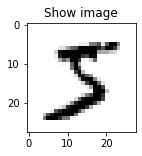

In [4]:
def plot_img(image):
    plt.figure(figsize=(2,2))
    plt.imshow(image,cmap='binary')
    plt.title("Show image")
    plt.show()

plot_img(x_train_image[0])

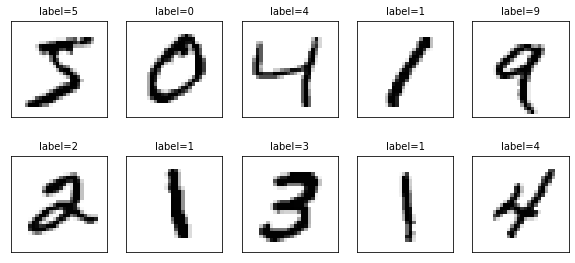

In [5]:
def show_multiple_image(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(10,12)
    
    # 大於25張只秀出 25 張
    if num>25:
        num =25
    
    for i in range(num):
        ax = plt.subplot(5,5, 1+i)            # 建立 subgraph 子圖形為5行5列
        ax.imshow(images[idx], cmap='binary') # 劃出 subgraph 子圖形
        
        title = "label=" + str(labels[idx])   # 設定 子圖形 title
        if len(prediction)>0:                 # 若有預測值，再加入子圖形 title
            title+=",predict =" + str(prediction[idx])
        
        ax.set_title(title, fontsize=10)      # 把 title 加上去
        ax.set_xticks([])                     # 設定不顯示刻度
        ax.set_yticks([])                     # 設定不顯示刻度
        
        idx+=1                                # 讀取下一筆
        
    plt.show()
    
show_multiple_image(x_train_image, y_train_label, [], 0, 10)

## <font color='dark'>Preprocessing the data</font>

### Reshape

In [6]:
print('x_train_data_shape : {shape}'.format(shape=x_train_image.shape))
print('x_test_data_shape : {shape}'.format(shape=x_test_image.shape))

x_train_data_shape : (60000, 28, 28)
x_test_data_shape : (10000, 28, 28)


In [7]:
x_train = x_train_image.reshape(60000,784).astype('float32')  
x_test  = x_test_image.reshape(10000,784).astype('float32')

In [8]:
print('x_train_data_shape : {shape}'.format(shape=x_train.shape))
print('x_test_data_shape : {shape}'.format(shape=x_test.shape))

x_train_data_shape : (60000, 784)
x_test_data_shape : (10000, 784)


### Normalization

In [9]:
x_train_normalize = x_train/255
x_test_normalize  = x_test/255

### Change the label

In [10]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**使用 np 的套件 np_utils.to_categorical 執行 One-hot encoding 轉換**

In [11]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot  = np_utils.to_categorical(y_test_label)

In [12]:
y_train_onehot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## <font color='dark'>Build the model (MLP)</font>

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

#### 建立輸入層和隱藏層

In [15]:
# Dense 層需要輸入以下的參數
model.add(Dense(units=256,                       #隱藏層的神經元有 256 個 
                input_dim=784,                   #輸入層的神經元有 784 個 
                kernel_initializer='normal',     #使用 normal distribution 的方式來分配亂數，初始化 weight(權重) 和 bias(偏差)
                activation = 'relu'))            #使用激活函式 relu

#### 建立輸出層

In [16]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation = 'softmax'))

#### 查看模型摘要

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


我們可以看到共有兩層 layer ，分別是 隱藏層(256個神經元) 跟 輸出層(10個神經元)

另外，因為隱藏層跟輸入層一起建立，所以沒有輸入層

Param 的計算公式為: 上層神經元數 * 下層神經元數 + 下層神經元數

Dense1 = 784*256+256

Dense2 = 256*10 +10

## <font color='dark'>Train the model</font>

建立模型之後，接著就是要不斷的反覆訓練，使用的方法為 反向傳播算法(Back Propagation)

首先，要先定義訓練的方式

In [18]:
model.compile(loss='categorical_crossentropy',   # loss =, 設定損失函數，在 Deep learning 通常用 cross entropy 效果比較好
              optimizer = 'adam',                # optimizer =, 設定訓練時的最優化方法，使用 adam 方法可使訓練更快收斂，提高準確率
              metrics = ['accuracy'])            # metrics =, 設定評估模型的方式 為 準確率 accuracy

接下來，開始進入訓練

In [19]:
train_history = model.fit(x = x_train_normalize,  # x 為 特徵值
                          y = y_train_onehot,     # y 為 label值
                          validation_split=0.2,   # 設定訓練與驗證資料的比例，0.2代表拿其中的 20% 作為驗證用的，其餘 80% 為訓練用的
                          epochs = 10,            # 執行的訓練週期， = 10 代表訓練 10 個循環
                          batch_size = 200,       # 每一個循環所跑的資料
                          verbose = 2)            # 設定顯示的訓練過程(等一下會 print 出來的方式)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.4412 - acc: 0.8817 - val_loss: 0.2221 - val_acc: 0.9387
Epoch 2/10
 - 1s - loss: 0.1926 - acc: 0.9457 - val_loss: 0.1590 - val_acc: 0.9558
Epoch 3/10
 - 1s - loss: 0.1370 - acc: 0.9605 - val_loss: 0.1299 - val_acc: 0.9633
Epoch 4/10
 - 1s - loss: 0.1054 - acc: 0.9697 - val_loss: 0.1115 - val_acc: 0.9676
Epoch 5/10
 - 1s - loss: 0.0843 - acc: 0.9756 - val_loss: 0.1113 - val_acc: 0.9685
Epoch 6/10
 - 1s - loss: 0.0676 - acc: 0.9811 - val_loss: 0.0941 - val_acc: 0.9724
Epoch 7/10
 - 1s - loss: 0.0560 - acc: 0.9839 - val_loss: 0.0873 - val_acc: 0.9738
Epoch 8/10
 - 1s - loss: 0.0466 - acc: 0.9869 - val_loss: 0.0889 - val_acc: 0.9723
Epoch 9/10
 - 1s - loss: 0.0393 - acc: 0.9897 - val_loss: 0.0834 - val_acc: 0.9752
Epoch 10/10
 - 1s - loss: 0.0328 - acc: 0.9921 - val_loss: 0.0836 - val_acc: 0.9758


我們可以看到總共跑了 10 次 (epochs = 10)，而每一次 loss(誤差) 越來越小，而acc(準確度)越來越高

我們來視覺化訓練的過程

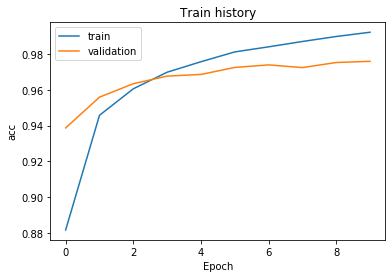

In [20]:
import matplotlib.pyplot as plt 

# train_history 為訓練過程所產生的資料
# train 為 80%訓練用的資料的執行結果， validation 為20%用來驗證的資料的執行結果
def show_train_history(train_history, train, validation):       
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'acc', 'val_acc')

我們可以看到後來 80% 訓練用的資料的準確度，比20%驗證用資料的準確度高

這是因為訓練是拿 80% 的資料去訓練，拿訓練過的資料去看準確率當然比較高

就好像老師出了100題題庫給學生練習，考試從這些題庫裡面出 一樣意思

而驗證用的資料就好像老師考試就出那些從沒教過的考題，所以學生的成績當然沒那麼高，但這比較客觀

造成的結果就是學生考試考題庫的考題很高分，但遇到現實的問題就 GG ~

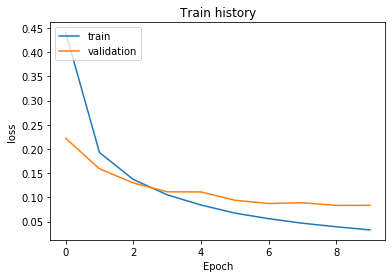

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x_test_normalize,y_test_onehot)
print(f'accuracy: {scores}')

10000/10000 [==============================] - 0s 46us/step
accuracy: [0.0744331663557794, 0.9771]


前幾個步驟我們已經建立過模型，並完全訓練完了，那我們可以來進行給 input 來預測

In [23]:
prediction = model.predict_classes(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

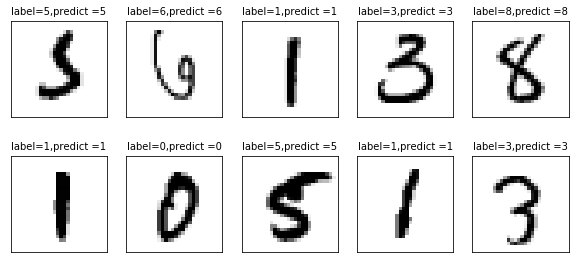

In [24]:
show_multiple_image(x_test_image, y_test_label, prediction, idx = 340, num=10)

從上面的例子中我們可以看到有一個錯誤，真實是5，但結果是3，

如果我們想要看那些數字預測比較高，而哪一些數字比較容易混淆，我們可以使用混淆矩陣來檢視我們的資料

混淆矩陣(confusion matrix)也被稱之為誤差矩陣(error matrix)，可以讓我們以視覺化的方式來了解監督式學習的結果，看 model 使否混淆哪幾類

#### 使用 pandas crosstab 建立 confusion matrix

In [25]:
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,0,1,2,2,1,2,0
1,0,1126,4,0,0,1,2,0,2,0
2,4,1,1013,1,1,0,2,5,5,0
3,0,0,6,982,0,6,0,7,4,5
4,0,1,6,0,962,2,2,2,1,6
5,2,0,0,2,1,874,5,2,4,2
6,6,3,2,1,5,3,935,0,3,0
7,1,6,9,2,0,0,0,1004,2,4
8,2,1,5,3,4,6,2,6,942,3


In [26]:
df = pd.DataFrame({'label':y_test_label, 'prediction':prediction})
df.head()

,label,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [27]:
# 顯示 label 是 5 但結果顯示不為 5 的資料
df[(df.label==5) & (df.prediction!=5)].head()

,label,prediction
8,5,6
720,5,8
951,5,4
1032,5,8
1299,5,7


## <font color='dark'>Build another model(with more units)</font>

In [28]:
from keras.models import Sequential
from keras.layers import  Dense

# 建立一個線性堆疊模組，後許只需要 model.add() 慢慢一層一層加上去
model = Sequential()

# Dense 層需要輸入以下的參數
model.add(Dense(units=1000,                       #隱藏層的神經元有 1000 個 
                input_dim=784,                   #輸入層的神經元有 784 個 
                kernel_initializer='normal',     #使用 normal distribution 的方式來分配亂數，初始化 weight(權重) 和 bias(偏差)
                activation = 'relu'))            #使用激活函式 relu

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation = 'softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(loss='categorical_crossentropy',   
              optimizer = 'adam',               
              metrics = ['accuracy'])            

In [30]:
train_history = model.fit(x = x_train_normalize,  # x 為 特徵值
                          y = y_train_onehot,     # y 為 label值
                          validation_split=0.2,   # 設定訓練與驗證資料的比例，0.2代表拿其中的 20% 作為驗證用的，其餘 80% 為訓練用的
                          epochs = 10,            # 執行的訓練週期， = 10 代表訓練 10 個循環
                          batch_size = 200,       # 每一個循環所跑的資料
                          verbose = 2)            # 設定顯示的訓練過程(等一下會 print 出來的方式)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.2938 - acc: 0.9158 - val_loss: 0.1451 - val_acc: 0.9588
Epoch 2/10
 - 2s - loss: 0.1144 - acc: 0.9667 - val_loss: 0.1078 - val_acc: 0.9699
Epoch 3/10
 - 2s - loss: 0.0742 - acc: 0.9785 - val_loss: 0.0910 - val_acc: 0.9730
Epoch 4/10
 - 2s - loss: 0.0519 - acc: 0.9848 - val_loss: 0.0867 - val_acc: 0.9733
Epoch 5/10
 - 2s - loss: 0.0352 - acc: 0.9905 - val_loss: 0.0801 - val_acc: 0.9755
Epoch 6/10
 - 3s - loss: 0.0251 - acc: 0.9939 - val_loss: 0.0753 - val_acc: 0.9774
Epoch 7/10
 - 2s - loss: 0.0194 - acc: 0.9952 - val_loss: 0.0753 - val_acc: 0.9778
Epoch 8/10
 - 2s - loss: 0.0131 - acc: 0.9971 - val_loss: 0.0756 - val_acc: 0.9787
Epoch 9/10
 - 3s - loss: 0.0090 - acc: 0.9986 - val_loss: 0.0764 - val_acc: 0.9781
Epoch 10/10
 - 2s - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0749 - val_acc: 0.9797


**準確率**

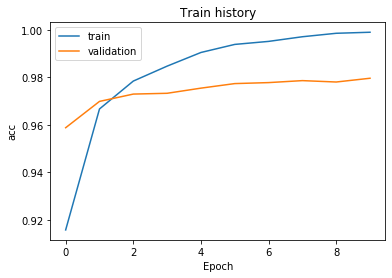

In [31]:
show_train_history(train_history, 'acc', 'val_acc')

## <font color='dark'>Build another model (with dropout in hidden layer)</font>

Dropout()功能是在每次的訓練過程中，會在隱藏層中隨機放棄 ，以避免 overfitting 的現象

In [32]:
from keras.layers import Dropout     #匯入 Dropout 模組


# 建立一個線性堆疊模組，後許只需要 model.add() 慢慢一層一層加上去
model = Sequential()

# Dense 層需要輸入以下的參數
model.add(Dense(units=1000,                       #隱藏層的神經元有 1000 個 
                input_dim=784,                   #輸入層的神經元有 784 個 
                kernel_initializer='normal',     #使用 normal distribution 的方式來分配亂數，初始化 weight(權重) 和 bias(偏差)
                activation = 'relu'))            #使用激活函式 relu

# 加入 Dropout 功能
model.add(Dropout(0.5))

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation = 'softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.compile(loss='categorical_crossentropy',   
              optimizer = 'adam',               
              metrics = ['accuracy'])            

In [34]:
train_history = model.fit(x = x_train_normalize,  # x 為 特徵值
                          y = y_train_onehot,     # y 為 label值
                          validation_split=0.2,   # 設定訓練與驗證資料的比例，0.2代表拿其中的 20% 作為驗證用的，其餘 80% 為訓練用的
                          epochs = 10,            # 執行的訓練週期， = 10 代表訓練 10 個循環
                          batch_size = 200,       # 每一個循環所跑的資料
                          verbose = 2)            # 設定顯示的訓練過程(等一下會 print 出來的方式)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3618 - acc: 0.8918 - val_loss: 0.1637 - val_acc: 0.9543
Epoch 2/10
 - 2s - loss: 0.1581 - acc: 0.9536 - val_loss: 0.1146 - val_acc: 0.9663
Epoch 3/10
 - 2s - loss: 0.1149 - acc: 0.9655 - val_loss: 0.0994 - val_acc: 0.9696
Epoch 4/10
 - 2s - loss: 0.0914 - acc: 0.9725 - val_loss: 0.0892 - val_acc: 0.9733
Epoch 5/10
 - 2s - loss: 0.0753 - acc: 0.9771 - val_loss: 0.0817 - val_acc: 0.9749
Epoch 6/10
 - 2s - loss: 0.0632 - acc: 0.9810 - val_loss: 0.0743 - val_acc: 0.9779
Epoch 7/10
 - 2s - loss: 0.0551 - acc: 0.9838 - val_loss: 0.0716 - val_acc: 0.9791
Epoch 8/10
 - 2s - loss: 0.0467 - acc: 0.9857 - val_loss: 0.0666 - val_acc: 0.9807
Epoch 9/10
 - 2s - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0684 - val_acc: 0.9788
Epoch 10/10
 - 2s - loss: 0.0382 - acc: 0.9879 - val_loss: 0.0660 - val_acc: 0.9792


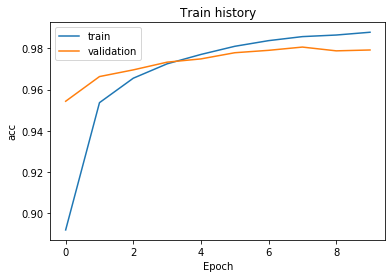

In [35]:
show_train_history(train_history, 'acc', 'val_acc')

In [36]:
scores = model.evaluate(x_test_normalize,y_test_onehot)
print()
print(f'accuracy: {scores}')

10000/10000 [==============================] - 1s 57us/step

accuracy: [0.0553164646850666, 0.9822]


## <font color='dark'>Build another model (with two hidden layer)</font>

In [37]:
from keras.layers import Dropout     #匯入 Dropout 模組


# 建立一個線性堆疊模組，後許只需要 model.add() 慢慢一層一層加上去
model = Sequential()

# Dense 層需要輸入以下的參數
model.add(Dense(units=1000,                       #隱藏層的神經元有 1000 個 
                input_dim=784,                   #輸入層的神經元有 784 個 
                kernel_initializer='normal',     #使用 normal distribution 的方式來分配亂數，初始化 weight(權重) 和 bias(偏差)
                activation = 'relu'))            #使用激活函式 relu

# 加入 Dropout 功能
model.add(Dropout(0.5))

# Dense 層需要輸入以下的參數
model.add(Dense(units=1000,                       #隱藏層的神經元有 1000 個 
                input_dim=784,                   #輸入層的神經元有 784 個 
                kernel_initializer='normal',     #使用 normal distribution 的方式來分配亂數，初始化 weight(權重) 和 bias(偏差)
                activation = 'relu'))            #使用激活函式 relu

# 加入 Dropout 功能
model.add(Dropout(0.5))

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation = 'softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.compile(loss='categorical_crossentropy',   
              optimizer = 'adam',               
              metrics = ['accuracy']) 

In [39]:
train_history = model.fit(x = x_train_normalize,  # x 為 特徵值
                          y = y_train_onehot,     # y 為 label值
                          validation_split=0.2,   # 設定訓練與驗證資料的比例，0.2代表拿其中的 20% 作為驗證用的，其餘 80% 為訓練用的
                          epochs = 10,            # 執行的訓練週期， = 10 代表訓練 10 個循環
                          batch_size = 200,       # 每一個循環所跑的資料
                          verbose = 2)            # 設定顯示的訓練過程(等一下會 print 出來的方式)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3714 - acc: 0.8830 - val_loss: 0.1303 - val_acc: 0.9604
Epoch 2/10
 - 4s - loss: 0.1612 - acc: 0.9508 - val_loss: 0.0982 - val_acc: 0.9706
Epoch 3/10
 - 4s - loss: 0.1199 - acc: 0.9630 - val_loss: 0.0842 - val_acc: 0.9761
Epoch 4/10
 - 4s - loss: 0.0985 - acc: 0.9681 - val_loss: 0.0779 - val_acc: 0.9760
Epoch 5/10
 - 4s - loss: 0.0837 - acc: 0.9732 - val_loss: 0.0850 - val_acc: 0.9742
Epoch 6/10
 - 4s - loss: 0.0740 - acc: 0.9767 - val_loss: 0.0833 - val_acc: 0.9760
Epoch 7/10
 - 4s - loss: 0.0647 - acc: 0.9789 - val_loss: 0.0715 - val_acc: 0.9791
Epoch 8/10
 - 4s - loss: 0.0642 - acc: 0.9794 - val_loss: 0.0719 - val_acc: 0.9806
Epoch 9/10
 - 4s - loss: 0.0560 - acc: 0.9821 - val_loss: 0.0778 - val_acc: 0.9783
Epoch 10/10
 - 4s - loss: 0.0512 - acc: 0.9827 - val_loss: 0.0730 - val_acc: 0.9796


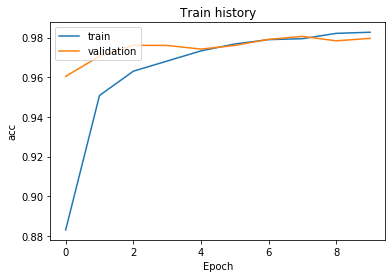

In [40]:
show_train_history(train_history, 'acc', 'val_acc')